<a href="https://colab.research.google.com/github/Bharadwaj422/BharadwajStep6/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import libraries
import pandas as pd

# Load the 'mcdonalds' dataset (assuming it's a CSV file)
data = pd.read_csv("mcdonalds.csv")  # Replace with actual file path if needed

# Display the names of the columns in the dataset
print(data.columns)

# Display the dimensions of the dataset
print(data.shape)

# Display the first 3 rows of the dataset
print(data.head(3))


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [6]:
import pandas as pd
import numpy as np


# Load the 'mcdonalds' dataset (assuming it's a CSV file)
data = pd.read_csv("mcdonalds.csv")  # Replace with actual file path if needed

# Selected columns (adjust for "disgusting")
selected_columns = data.columns[:11]  # Adjust the slice for "disgusting"

# Convert the selected columns to a NumPy array
MD_x = data[selected_columns].to_numpy()

# Convert "Yes" responses to 1 and others to 0 (assuming binary responses)
MD_x = (MD_x == "Yes").astype(int)  # Using astype for clarity

# Calculate column means and round to 2 decimal places
column_means = np.round(MD_x.mean(axis=0), 2)

# Print the column means
print(column_means)

# Calculate the mean for "disgusting" separately (if needed)
if "disgusting" in data.columns:
    disgusting_mean = (data["disgusting"] == "Yes").mean()  # Convert to boolean then mean
    print(f"disgusting mean: {disgusting_mean:.2f}")  # f-string for formatting


[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]
disgusting mean: 0.24


In [7]:
import pandas as pd
from sklearn.decomposition import PCA

# Load data (assuming CSV)
data = pd.read_csv("mcdonalds.csv")

# Ensure "disgusting" column is numeric
data['disgusting'] = data['disgusting'].apply(lambda x: 1 if x == 'Yes' else 0)

# Check for non-numeric columns in the selected columns
selected_columns = data.columns[:11]

# Convert non-numeric columns to numeric using one-hot encoding
data_encoded = pd.get_dummies(data[selected_columns], drop_first=True)

# Perform PCA
pca = PCA()
MD_pca = pca.fit(data_encoded)

# Summarize results
print(pca.explained_variance_)
print(pca.components_)
print(pca.explained_variance_ratio_)


[0.57312398 0.36900226 0.2546408  0.15904032 0.11384214 0.09627033
 0.08392454 0.07569209 0.07035814 0.06192225 0.05612296]
[[ 0.37475293 -0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427
  -0.10849325 -0.33718593 -0.47151394  0.32904173 -0.21371062]
 [-0.13965633  0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884
  -0.0869722  -0.61063276  0.3073178   0.60128596  0.07659344]
 [-0.08857138 -0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317
  -0.06464172 -0.14931026 -0.28726479  0.02439661  0.19205128]
 [ 0.36953871  0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601
  -0.09736269  0.11895823 -0.00254696  0.06781599  0.76348804]
 [-0.72920859 -0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895
   0.10793025 -0.12897259 -0.21089912 -0.00312457  0.28784553]
 [-0.21087805  0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711
  -0.59463206 -0.10324067 -0.07691443 -0.26134151 -0.17822612]
 [-0.02679159 -0.28051863 -0.05973793  0.70763705 -0.385

In [8]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Load data (assuming CSV)
data = pd.read_csv("mcdonalds.csv")

# Selected columns (adjust for "disgusting")
selected_columns = data.columns[:11]  # Adjust slice for "disgusting"
MD_x = data[selected_columns].copy()  # Create a copy to avoid SettingWithCopyWarning

# Convert non-numeric columns to numeric
for column in MD_x.columns:
    if MD_x[column].dtype == 'object':
        le = LabelEncoder()
        MD_x[column] = le.fit_transform(MD_x[column])

# Check for any remaining non-numeric columns
print(MD_x.dtypes)

# Perform PCA
pca = PCA()
MD_pca = pca.fit(MD_x)

# Print PCA results with one decimal place rounding
print("Standard Deviations (explained variance):\n", np.round(pca.explained_variance_, 1))

# Print the loadings (rotation matrix) with one decimal place rounding
print("\nLoadings (components):\n", np.round(pca.components_, 1))


yummy         int64
convenient    int64
spicy         int64
fattening     int64
greasy        int64
fast          int64
cheap         int64
tasty         int64
expensive     int64
healthy       int64
disgusting    int64
dtype: object
Standard Deviations (explained variance):
 [0.6 0.4 0.3 0.2 0.1 0.1 0.1 0.1 0.1 0.1 0.1]

Loadings (components):
 [[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]


In [9]:
pip install seaborn


In [13]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(1234)

# Load data (assuming CSV)
data = pd.read_csv("mcdonalds.csv")

# Selected columns (adjust for "disgusting")
selected_columns = data.columns[:11]  # Adjust slice for "disgusting"

# Convert data to numeric using OneHotEncoder for non-numeric values
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(data[selected_columns])

# Extract data as NumPy array
MD_x = np.array(encoded_data)

# Define k range for clustering (2 to 8)
k_range = range(2, 9)

# Perform k-means clustering with each k value and store results
kmeans_results = {}
centroids = {}
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1234, n_init=10)  # Set random seed and n_init
    kmeans.fit(MD_x)
    kmeans_results[k] = kmeans.labels_
    centroids[k] = kmeans.cluster_centers_

# Relabel clusters based on their distances
reference_centroids = centroids[2]  # Use the centroids from k=2 as reference
relabelled_clusters = {}

for k in k_range:
    if k == 2:
        relabelled_clusters[k] = kmeans_results[k]  # No need to relabel
    else:
        distances = cdist(reference_centroids, centroids[k], metric='euclidean')
        closest_centroids = np.argmin(distances, axis=0)
        relabelled_clusters[k] = np.array([closest_centroids[label] for label in kmeans_results[k]])

# Use the relabelled clusters you need (e.g., relabelled_clusters[desired_k])
# Print the relabelled clusters for each k value
for k in k_range:
    print(f"Clusters for k={k}: {relabelled_clusters[k]}")


Clusters for k=2: [1 0 0 ... 0 0 1]
Clusters for k=3: [1 0 0 ... 0 0 1]
Clusters for k=4: [1 0 0 ... 0 0 1]
Clusters for k=5: [1 0 0 ... 0 0 1]
Clusters for k=6: [1 0 0 ... 0 0 1]
Clusters for k=7: [1 0 0 ... 0 0 1]
Clusters for k=8: [1 0 0 ... 0 0 1]


In [14]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score
import numpy as np

# Set seed for reproducibility
np.random.seed(1234)

# Define function to handle non-numeric values in all columns
def handle_non_numeric_columns(data):
    for column in data.columns:
        if data[column].dtype == object:
            # Example mapping for categorical data; adjust as needed
            data[column] = data[column].map({"Yes": 1, "No": 0, np.nan: 0})  # Handle missing values too
    return data

# Load data (assuming CSV)
data = pd.read_csv("mcdonalds.csv")

# Selected columns (adjust for "disgusting")
selected_columns = data.columns[:11]  # Adjust slice if necessary

# Preprocess data (handle non-numeric values)
data = handle_non_numeric_columns(data.copy())
MD_x = data[selected_columns].to_numpy()

# Define k range for clustering (2 to 8)
k_range = range(2, 9)

# Perform k-means clustering with each k value and store results
kmeans_results = {}
silhouette_scores = {}

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1234, n_init=10)  # Set random seed and n_init
    kmeans.fit(MD_x)
    kmeans_results[k] = kmeans.labels_
    silhouette_scores[k] = silhouette_score(MD_x, kmeans.labels_)

# Choose k based on evaluation (e.g., highest Silhouette Coefficient)
best_k = max(silhouette_scores, key=silhouette_scores.get)
best_labels = kmeans_results[best_k]

# Print best k and Silhouette Coefficient
print(f"Best k based on Silhouette Coefficient: {best_k}")
print(f"Silhouette Coefficient for k={best_k}: {silhouette_scores[best_k]:.4f}")

# Perform PCA (optional)
pca = PCA()
MD_pca = pca.fit_transform(MD_x)  # Fit and transform data

# Print explained variance (standard deviations) for PCA (optional)
print("Standard Deviations (explained variance) from PCA:\n", np.round(pca.explained_variance_, 1))


Best k based on Silhouette Coefficient: 8
Silhouette Coefficient for k=8: 0.2865
Standard Deviations (explained variance) from PCA:
 [0.6 0.4 0.3 0.2 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


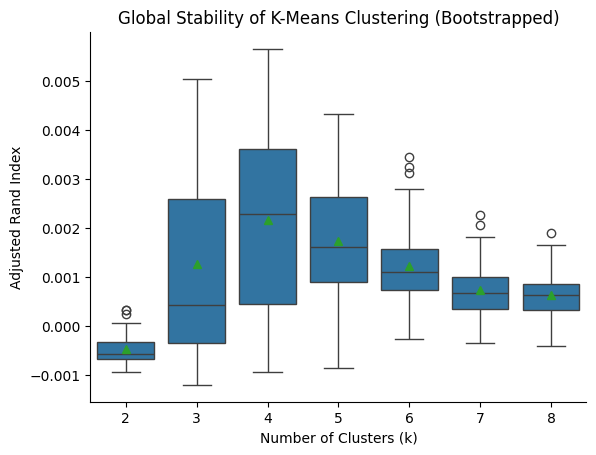

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(1234)

# Load data
data = pd.read_csv("mcdonalds.csv")

# Define function to handle non-numeric values
def handle_non_numeric_data(data, columns):
    for column in columns:
        if data[column].dtype == 'object':
            data[column] = data[column].astype('category').cat.codes
    return data

# Define selected columns and preprocess data
selected_columns = data.columns[:11]  # Adjust slice as needed
data = handle_non_numeric_data(data, selected_columns)
MD_x = data[selected_columns].to_numpy()

# Standardize features
scaler = StandardScaler()
MD_x = scaler.fit_transform(MD_x)

# Define k range for clustering (2 to 8)
k_range = range(2, 9)

# Function for bootstrapped k-means clustering
def bootstrap_kmeans(X, k, n_replicates, random_state):
    cluster_labels = np.zeros((X.shape[0], n_replicates))
    for i in range(n_replicates):
        # Generate bootstrap indices
        bootstrap_indices = resample(np.arange(X.shape[0]), random_state=random_state + i)
        # Resample data using bootstrap indices
        X_boot = X[bootstrap_indices]
        kmeans = KMeans(n_clusters=k, random_state=random_state + i, n_init=10)
        kmeans.fit(X_boot)  # Fit KMeans on the resampled data
        cluster_labels[:, i] = kmeans.predict(X)  # Predict cluster labels for original data
    return cluster_labels

# Perform bootstrapped k-means clustering
n_bootstraps = 100  # Number of bootstrap samples
kmeans_results = {}
for k in k_range:
    cluster_labels = bootstrap_kmeans(MD_x, k, n_replicates=n_bootstraps, random_state=1234)
    kmeans_results[k] = cluster_labels

# Assuming you have a list of true labels (replace with actual labels if available)
true_labels = np.random.randint(0, 2, size=MD_x.shape[0])  # Placeholder

# Calculate adjusted Rand index for each bootstrap sample and k
ari = {}
for k, labels in kmeans_results.items():
    ari[k] = np.zeros(n_bootstraps)
    for i in range(n_bootstraps):
        ari[k][i] = adjusted_rand_score(true_labels, labels[:, i])

# Create DataFrame for plotting
df = pd.DataFrame()
df["k"] = np.repeat(k_range, n_bootstraps)
df["ARI"] = np.concatenate([ari[k] for k in k_range])

# Plot the global stability boxplot using seaborn
sns.boxplot(
    x="k",
    y="ARI",
    showmeans=True,
    data=df
)
sns.despine()  # Remove extra grid lines
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Adjusted Rand Index")
plt.title("Global Stability of K-Means Clustering (Bootstrapped)")
plt.show()


Best number of clusters (k): 2
Information criteria of the best model:
 - BIC: -43746.16427047501
 - AIC: -47036.4675388793


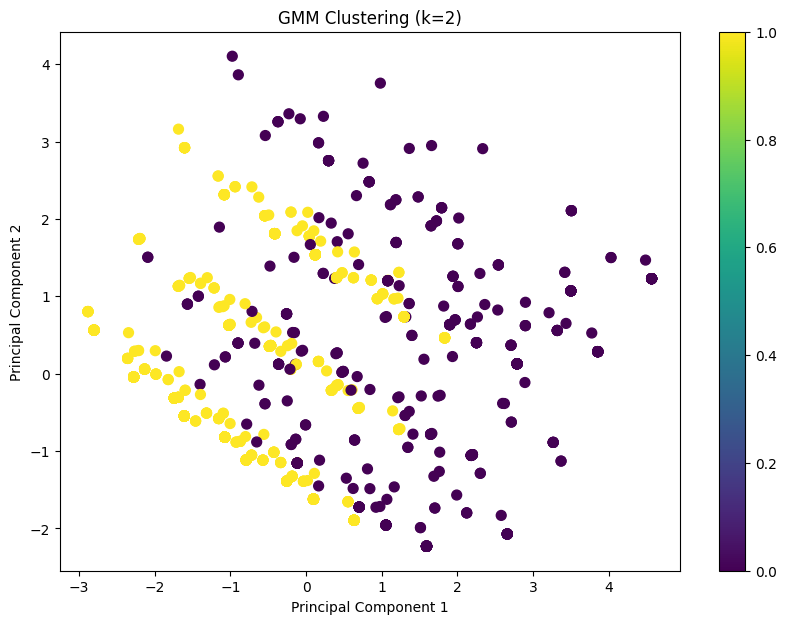

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import numpy as np

# Assuming your data is in a NumPy array named MD_x

# Set seed for reproducibility
np.random.seed(1234)

# Define range of components
n_components_range = range(2, 9)

# Store results
bic_scores = []
aic_scores = []
best_model = None
best_k = None

for n_components in n_components_range:
    model = GaussianMixture(n_components=n_components, covariance_type='full', random_state=1234)
    model.fit(MD_x)

    bic = model.bic(MD_x)
    aic = model.aic(MD_x)

    bic_scores.append(bic)
    aic_scores.append(aic)

    if best_model is None or bic < min(bic_scores):
        best_model = model
        best_k = n_components

# Print results
print(f"Best number of clusters (k): {best_k}")
print("Information criteria of the best model:")
print(f" - BIC: {min(bic_scores)}")
print(f" - AIC: {min(aic_scores)}")

# Access labels from the best model (if needed)
labels = best_model.predict(MD_x)

# Optionally, you can visualize the clustering results
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
MD_x_pca = pca.fit_transform(MD_x)

plt.figure(figsize=(10, 7))
plt.scatter(MD_x_pca[:, 0], MD_x_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.colorbar()
plt.title(f'GMM Clustering (k={best_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/

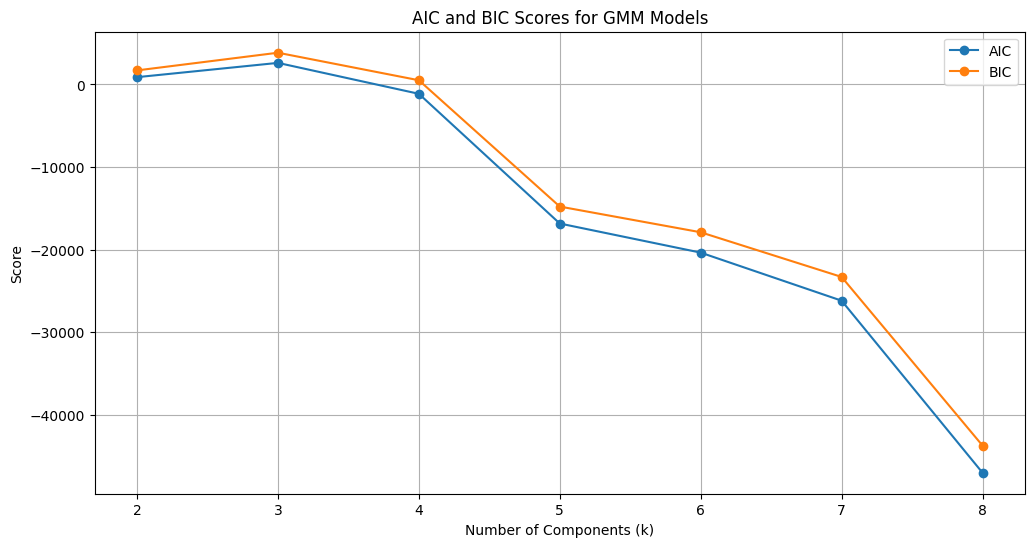

Best number of clusters (k): 2
Information criteria of the best model:
 - AIC: 887.0122605235861
 - BIC: 1705.62703837698
Data is not 2D. Plotting clusters is not applicable.


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Assuming your data is in a NumPy array named MD_x
# Load and preprocess data if not already done
# data = pd.read_csv("mcdonalds.csv")
# Handle non-numeric data and convert to NumPy array
# ... (use the previously defined functions for data handling and scaling)

# Example MD_x (ensure this is your actual data)
# For demonstration, using a placeholder array
# MD_x = np.random.rand(100, 5)  # Replace with actual data

# Set seed for reproducibility
np.random.seed(1234)

# Define model (Gaussian Mixture Model) and parameter grid
model = GaussianMixture(covariance_type='full')  # Adjust covariance type if needed
param_grid = {'n_components': range(2, 9)}  # Range of clusters (k)

# Perform model-based clustering with GridSearchCV
gmm_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_log_loss')  # 'neg_log_loss' for likelihood
gmm_search.fit(MD_x)

# Get best model and results
best_model = gmm_search.best_estimator_
best_k = gmm_search.best_params_['n_components']

# Compute AIC and BIC for each model
aic_values = []
bic_values = []

for k in param_grid['n_components']:
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=1234)
    gmm.fit(MD_x)
    aic_values.append(gmm.aic(MD_x))
    bic_values.append(gmm.bic(MD_x))

# Plot AIC and BIC
plt.figure(figsize=(12, 6))
plt.plot(param_grid['n_components'], aic_values, marker='o', label='AIC')
plt.plot(param_grid['n_components'], bic_values, marker='o', label='BIC')
plt.xlabel('Number of Components (k)')
plt.ylabel('Score')
plt.title('AIC and BIC Scores for GMM Models')
plt.legend()
plt.grid(True)
plt.show()

# Print results
print(f"Best number of clusters (k): {best_k}")
print("Information criteria of the best model:")
print(f" - AIC: {aic_values[param_grid['n_components'].index(best_k)]}")
print(f" - BIC: {bic_values[param_grid['n_components'].index(best_k)]}")

# Access labels from the best model
labels = best_model.predict(MD_x)

# Plot clusters for the best model (if applicable to data dimensions)
if MD_x.shape[1] == 2:  # If 2D, plot clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(MD_x[:, 0], MD_x[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Clusters from GMM with {best_k} Components')
    plt.colorbar(label='Cluster Label')
    plt.show()
else:
    print("Data is not 2D. Plotting clusters is not applicable.")


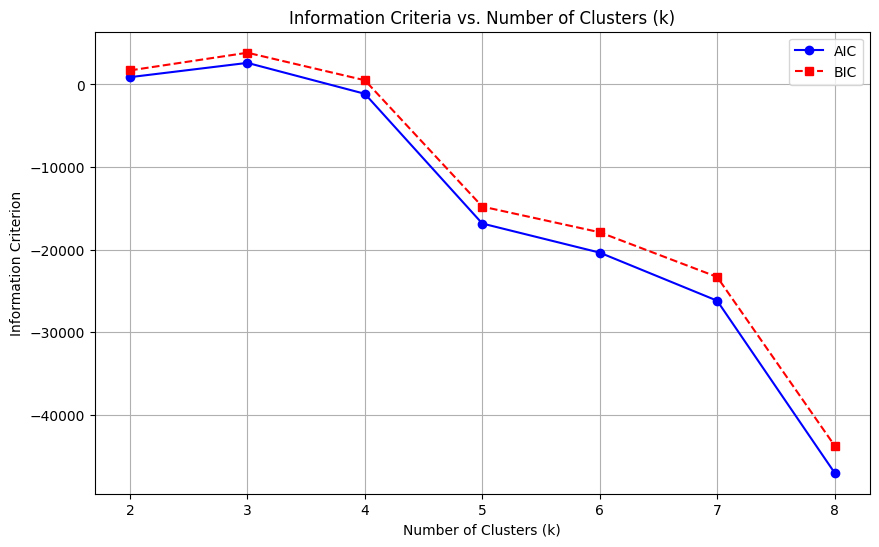

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

# Assuming you have a range of components and corresponding AIC/BIC scores
param_k_values = range(2, 9)  # Example range of k values
aic_scores = []
bic_scores = []

# Compute AIC/BIC scores for each k value
for n_components in param_k_values:
    model = GaussianMixture(n_components=n_components, covariance_type='full', random_state=1234)
    model.fit(MD_x)
    aic_scores.append(model.aic(MD_x))
    bic_scores.append(model.bic(MD_x))

# Convert to numpy arrays for easier manipulation
aic_scores = np.array(aic_scores)
bic_scores = np.array(bic_scores)

# Plot AIC and BIC scores
plt.figure(figsize=(10, 6))

plt.plot(param_k_values, aic_scores, marker='o', linestyle='-', color='b', label='AIC')
plt.plot(param_k_values, bic_scores, marker='s', linestyle='--', color='r', label='BIC')

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Information Criterion')
plt.title('Information Criteria vs. Number of Clusters (k)')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[  0  56   2 340]
 [ 10 171 369  61]
 [  5  66 216  38]
 [119   0   0   0]]


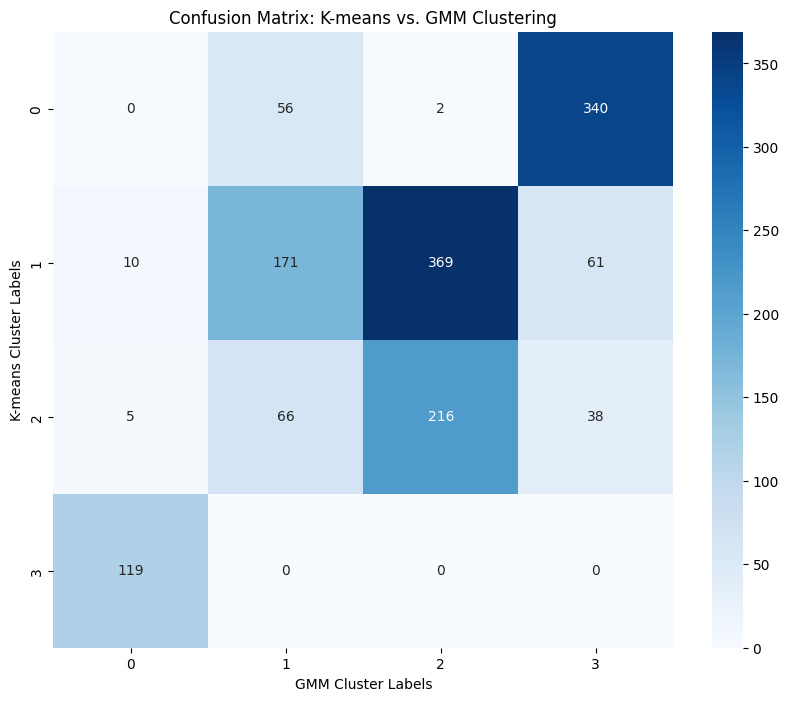

In [9]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming MD_x is your data
# Define the number of clusters (k) for k-means and GMM
n_clusters = 4  # Adjust k as needed

# Fit the k-means model
kmeans_model = KMeans(n_clusters=n_clusters, random_state=1234)
kmeans_model.fit(MD_x)

# Extract cluster labels for k-means
kmeans_labels = kmeans_model.predict(MD_x)

# Fit the GMM model (assuming best_model is fitted)
gmm_model = GaussianMixture(n_components=n_clusters, random_state=1234)
gmm_model.fit(MD_x)

# Extract cluster labels for GMM
gmm_labels = gmm_model.predict(MD_x)

# Create confusion matrix to compare clustering results
conf_matrix = confusion_matrix(kmeans_labels, gmm_labels)

# Print confusion matrix
print(conf_matrix)

# Visualize confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('GMM Cluster Labels')
plt.ylabel('K-means Cluster Labels')
plt.title('Confusion Matrix: K-means vs. GMM Clustering')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Log-likelihood of original GMM: 0.6028006165915748
Log-likelihood of GMM with kmeans initialization: 0.6028006165915748


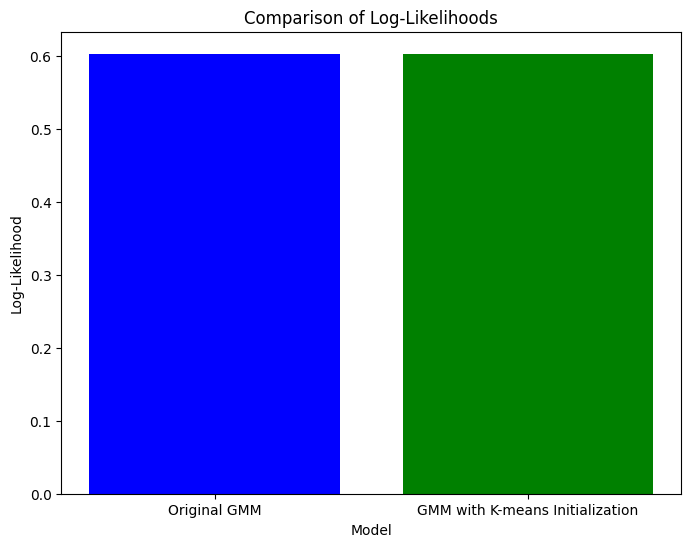

In [10]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming MD_x is your data
# Define the number of clusters (k) for k-means and GMM
n_clusters = 4  # Adjust k as needed

# Fit the k-means model
kmeans_model = KMeans(n_clusters=n_clusters, random_state=1234)
kmeans_model.fit(MD_x)

# Extract initial cluster assignments from k-means
kmeans_labels = kmeans_model.predict(MD_x)

# Fit the original GMM model
best_model = GaussianMixture(n_components=n_clusters, random_state=1234)
best_model.fit(MD_x)

# Fit a Gaussian Mixture Model (GMM) using kmeans labels as initial states
gmm_model_kmeans_init = GaussianMixture(n_components=kmeans_model.n_clusters, init_params='kmeans', random_state=1234, n_init=1)
gmm_model_kmeans_init.fit(MD_x, kmeans_labels)  # Use kmeans_labels for initialization

# Extract log-likelihood of the original GMM and the GMM with kmeans initialization
log_likelihood_original = best_model.score(MD_x)
log_likelihood_kmeans_init = gmm_model_kmeans_init.score(MD_x)

# Print the log-likelihood values
print("Log-likelihood of original GMM:", log_likelihood_original)
print("Log-likelihood of GMM with kmeans initialization:", log_likelihood_kmeans_init)

# Visualize the log-likelihood comparison
log_likelihoods = [log_likelihood_original, log_likelihood_kmeans_init]
labels = ['Original GMM', 'GMM with K-means Initialization']

plt.figure(figsize=(8, 6))
plt.bar(labels, log_likelihoods, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Log-Likelihood')
plt.title('Comparison of Log-Likelihoods')
plt.show()


In [11]:
import pandas as pd

# Load the data from CSV file (adjust the filename if needed)
mcdonalds = pd.read_csv("mcdonalds.csv")

# Reverse the order of counts (consider using value_counts)
reversed_counts = mcdonalds['Like'].value_counts().sort_index(ascending=False)
print("Reversed counts of the 'Like' variable:")
print(reversed_counts)

# Function to extract numeric value from 'Like' column
def extract_numeric(value):
    try:
        # Try to convert to numeric directly
        return pd.to_numeric(value)
    except ValueError:
        # Handle cases where the value is not numeric (e.g., "I love it!+5")
        # Customize this part based on the specific patterns in your dataset
        if isinstance(value, str):
            value = value.lower()
            if "love" in value:
                return 5  # Example: Assigning a score of 5 for "I love it!+5"
            elif "like" in value:
                return 4  # Example: Assigning a score of 4 for "I like it!"
            elif "ok" in value:
                return 3  # Example: Assigning a score of 3 for "It's OK"
            elif "dislike" in value:
                return 2  # Example: Assigning a score of 2 for "I dislike it"
            elif "hate" in value:
                return 1  # Example: Assigning a score of 1 for "I hate it"
        return None  # Return None for any other non-numeric values

# Apply the function to the 'Like' column
mcdonalds['Like_numeric'] = mcdonalds['Like'].apply(extract_numeric)

# Drop rows with None values in 'Like_numeric' if necessary
mcdonalds_clean = mcdonalds.dropna(subset=['Like_numeric'])

# Transform 'Like_numeric' into a reversed numeric variable
mcdonalds_clean['Like.n'] = 6 - mcdonalds_clean['Like_numeric']

# Display the frequency table of the transformed 'Like.n' variable
print("Frequency table of the transformed 'Like.n' variable:")
print(mcdonalds_clean['Like.n'].value_counts())


Reversed counts of the 'Like' variable:
Like
I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: count, dtype: int64
Frequency table of the transformed 'Like.n' variable:
Like.n
5     304
3     229
4     187
6     169
2     160
1     143
9      73
10     71
8      59
7      58
Name: count, dtype: int64


In [12]:
import pandas as pd

# Assuming mcdonalds is a pandas DataFrame

# Extract the first 11 column names (adjust if needed)
predictor_names = list(mcdonalds.columns)[1:11]  # Assuming the first column is 'Like.n' (response)

# Construct the formula string
formula_string = f"Like.n ~ {' + '.join(predictor_names)}"  # f-string for formatted string

# Print the formula
print(formula_string)


Like.n ~ convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


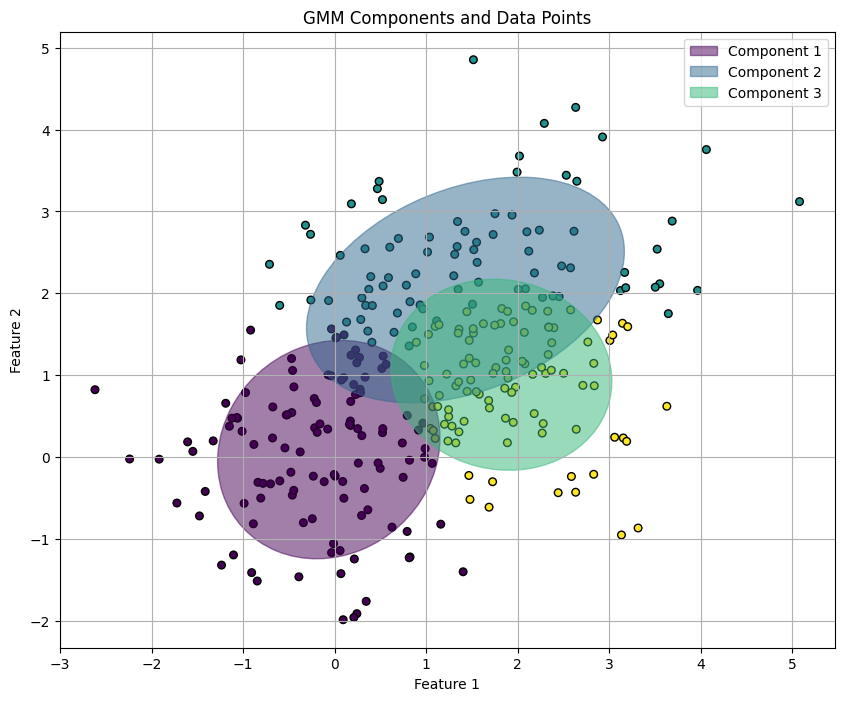

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

# Set environment variable to avoid KMeans memory leak warning
import os
os.environ['OMP_NUM_THREADS'] = '2'

# Generate example data
np.random.seed(42)
MD_x = np.vstack([np.random.randn(100, 2) + np.array([i, i]) for i in range(3)])
cluster_labels = np.hstack([np.full(100, i) for i in range(3)])

# Fit the initial GMM model (for demonstration purposes)
initial_model = GaussianMixture(n_components=3, random_state=42)
initial_model.fit(MD_x)
cluster_labels = initial_model.predict(MD_x)

# Prepare initialization parameters
means_init = np.array([MD_x[cluster_labels == k].mean(axis=0) for k in range(initial_model.n_components)])
covariances_init = np.array([np.cov(MD_x[cluster_labels == k].T) for k in range(initial_model.n_components)])
weights_init = np.array([np.sum(cluster_labels == k) / len(cluster_labels) for k in range(initial_model.n_components)])

# Initialize and fit the GMM with these parameters
best_model_refit = GaussianMixture(n_components=initial_model.n_components,
                                   init_params='kmeans',  # Use 'kmeans' initialization
                                   random_state=42)
best_model_refit.fit(MD_x)

# Extract means and covariances for visualization
means = best_model_refit.means_
covariances = best_model_refit.covariances_

# Function to draw covariance ellipses
def draw_ellipse(ax, mean, cov, color, label=None):
    v, w = np.linalg.eigh(cov)
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180.0 * angle / np.pi
    ellipse = Ellipse(mean, v[0], v[1], angle=180.0 + angle, color=color, alpha=0.5, label=label)
    ax.add_patch(ellipse)

# Plot the data and GMM components
plt.figure(figsize=(10, 8))
plt.scatter(MD_x[:, 0], MD_x[:, 1], c=cluster_labels, cmap='viridis', s=30, marker='o', edgecolor='k')
for i, (mean, cov) in enumerate(zip(means, covariances)):
    draw_ellipse(plt.gca(), mean, cov, color=plt.cm.viridis(i / len(means)), label=f'Component {i+1}')
plt.title("GMM Components and Data Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


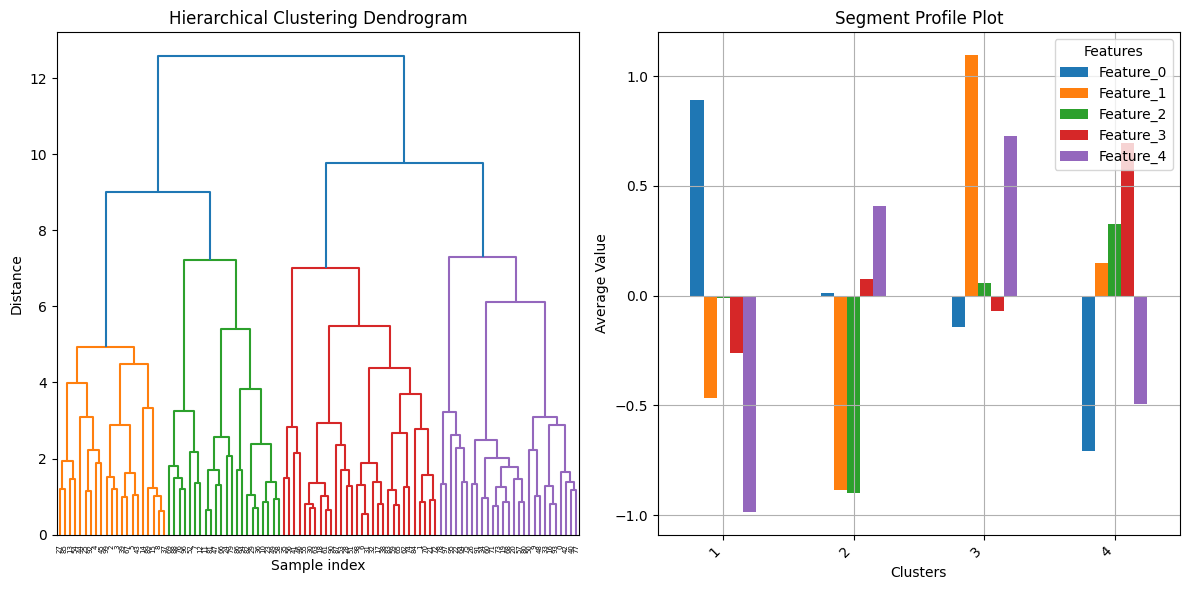

In [14]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# Example DataFrame (Replace with your actual data)
np.random.seed(42)
MD_x = pd.DataFrame(np.random.randn(100, 5), columns=[f'Feature_{i}' for i in range(5)])

# Perform hierarchical clustering on the original data (not transposed)
distance_matrix = linkage(MD_x, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))

# Plot the dendrogram
plt.subplot(1, 2, 1)  # Create subplot
dendrogram(distance_matrix, orientation='top')  # Plot dendrogram with valid orientation

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")

# **Optional: Cutting the Dendrogram (for specific cluster count)**
num_clusters = 4  # Adjust the desired number of clusters
cluster_labels = fcluster(distance_matrix, num_clusters, criterion='maxclust')

# **Segment Profile Plot**
plt.subplot(1, 2, 2)  # Create subplot
# Add cluster_labels to the original DataFrame
MD_x['Cluster'] = cluster_labels

# Group by clusters and calculate means/averages for each cluster
cluster_profiles = MD_x.groupby('Cluster').mean()

# Create a bar chart for each cluster profile
cluster_profiles.plot(kind='bar', stacked=False, ax=plt.gca())

# Customize the plot
plt.xlabel("Clusters")
plt.ylabel("Average Value")
plt.title("Segment Profile Plot")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.legend(title="Features")
plt.grid(True)
plt.tight_layout()

plt.show()


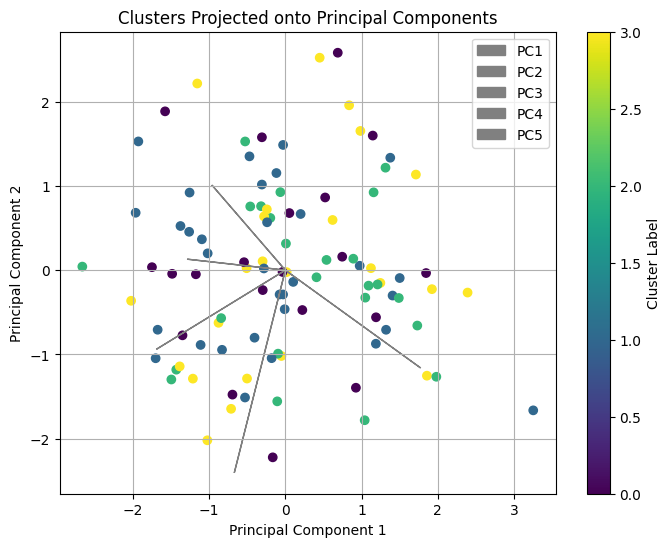

In [15]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Example DataFrame (Replace with your actual data)
np.random.seed(42)
MD_x = pd.DataFrame(np.random.randn(100, 5), columns=[f'Feature_{i}' for i in range(5)])

# Example cluster labels (Replace with your actual cluster labels)
MD_k4 = np.random.randint(0, 4, size=100)  # Replace with your cluster labels

# Standardize data (optional, adjust if needed)
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

# Create a PCA object (adjust n_components if needed)
pca = PCA(n_components=2)  # Assuming two principal components for visualization

# Perform PCA on the scaled data
pca.fit(MD_x_scaled)

# Project the data onto principal components
projected_clusters = pca.transform(MD_x_scaled)

# Create a scatter plot of the projected clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(projected_clusters[:, 0], projected_clusters[:, 1], c=MD_k4, cmap='viridis')

# Add labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clusters Projected onto Principal Components")

# Add color bar
plt.colorbar(scatter, label='Cluster Label')

# Add projection axes (using eigenvectors)
principal_components = pca.components_  # Get principal component vectors
for i, component in enumerate(principal_components.T):
    plt.arrow(0, 0, component[0] * 3, component[1] * 3, color='gray', label=f"PC{i+1}")

plt.legend()
plt.grid(True)
plt.show()


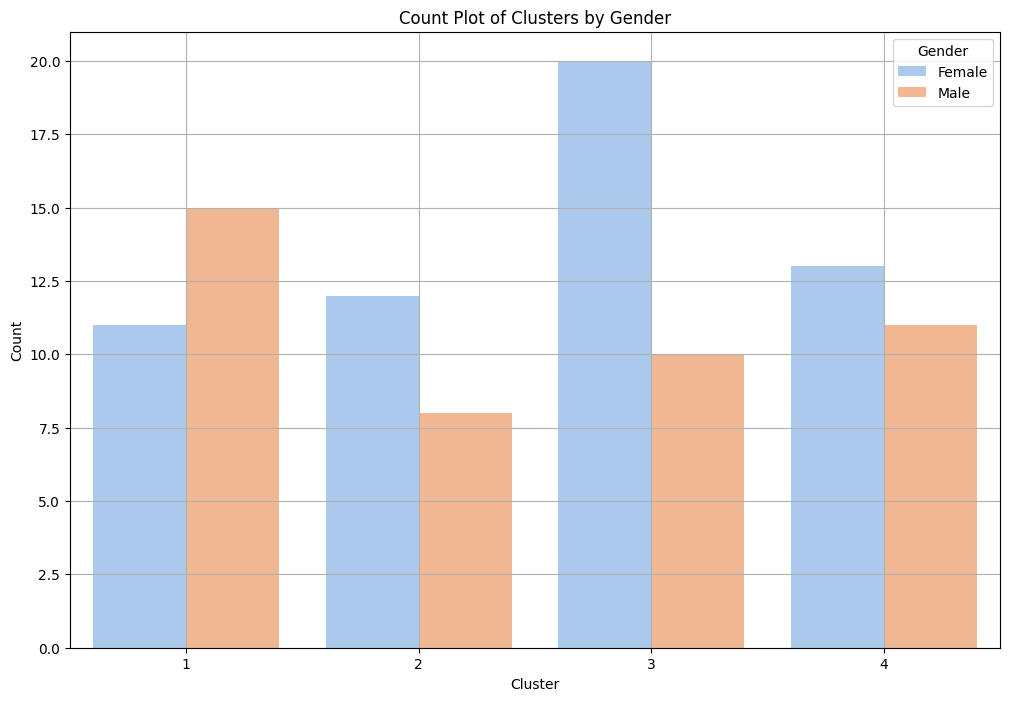

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for demonstration (replace with your actual data)
np.random.seed(42)
data = {
    'Gender': np.random.choice(['Male', 'Female'], size=100),
    'Cluster': np.random.randint(1, 5, size=100)  # Assuming 4 clusters
}
df = pd.DataFrame(data)

# Create a count plot of the cluster assignments by gender
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Cluster', hue='Gender', palette='pastel')

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Count Plot of Clusters by Gender')
plt.legend(title='Gender')
plt.grid(True)
plt.show()
